In [68]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pprint
pp = pprint.PrettyPrinter(indent=4)
%matplotlib inline

<h1>Example network: a Small World network</h1>

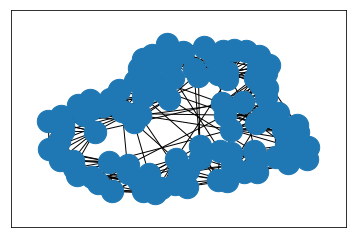

In [69]:
sw = nx.watts_strogatz_graph(100,12,0.05)
# Initialize the position
pos = nx.spring_layout(sw,scale=0.2)
# draw all the nodes
nx.draw_networkx_nodes(sw,pos,node_size=500)
nx.draw_networkx_edges(sw,pos)
plt.show()

<h1>Community Detection</h1>

<h2>Algorithm: $k$-clique-community detection</h2>
$k$-clique detection finds communities of cliques of minimum degree $k$ that share at least $k-1$ nodes. The algorithm uses a percolation method to find these communities: a $k$-clique topological "template" is fitted over a clique, and one node of the clique is switched with another connected node outside of the clique. If this group of nodes is also a clique, that node is added to the $k$-clique-community. This is repeated until all cliques are visited.

In [70]:
from networkx.algorithms.community import k_clique_communities

In [71]:
for i in range(2,10):
    c = list(k_clique_communities(sw,i))
    print('{}-clique: '.format(i),len(c), "communities")

2-clique:  1 communities
3-clique:  1 communities
4-clique:  1 communities
5-clique:  2 communities
6-clique:  5 communities
7-clique:  10 communities
8-clique:  0 communities
9-clique:  0 communities


In [72]:
# we use 6-clique communities
c = list(k_clique_communities(sw,6))

In [73]:
len(c)

5

0
1
2
3
4


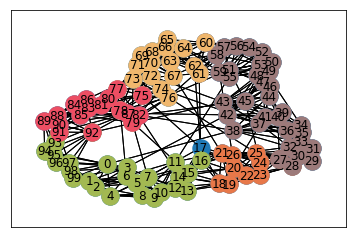

In [74]:
nx.draw_networkx(sw,pos)
for i in range(5):
    print(i)
    nx.draw_networkx_nodes(sw, pos, with_labels=True, nodelist=c[i], node_color=[np.random.uniform(0.25,0.95,3)]) # generates a random RGB color
nx.draw_networkx_edges(sw,pos)
plt.show()

<h2>Algorithm: Girvan-Newman</h2>
This method finds communities by iteratively removing edges with maximum betweenness centrality, recalculating centrality for the affected nodes, then removing the max-betweenness edge, etc. 

Betweenness centrality for edge $e$ is calculated as:
\begin{align}
g(e) = \sum_{s \neq t} \frac{\sigma_{st}(e)}{\sigma_{st}}
\end{align}
where $s,t$ are the starting and terminal nodes, and $\sigma_{st}$ is the number of shortest paths from $s\rightarrow t$, and $\sigma_{st}(e)$ is the number of those shortest paths that contain edge $e$

Determining when to stop removing edges is a free parameter in the algorithm. Typical choices include: reaching a predefined number of separate remaining subgraphs or maximization of modularity (discussed later). 

In [75]:
from networkx.algorithms.community.centrality import girvan_newman
import itertools

In [76]:
c = list(girvan_newman(sw))
k = 4
partitions =0;
comp = girvan_newman(sw)

limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    partitions+=1
    print((tuple(sorted(c) for c in communities)))
    
    
print('Number of hierarchies:',partitions)
print('Selecting',k,'clusters:',c[partitions-1])
print('First partition: ',c[0])
print('Second partition: ',c[1])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 91, 92, 93, 94, 95, 96, 97, 98, 99], [25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90])
([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 91, 92, 93, 94, 95, 96, 97, 98, 99], [25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90])
([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 91, 92, 93, 94, 95, 96, 97, 98, 99], [13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27], [25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 

In [77]:
## Pick one with 4 partitions
cd = list(c[2])  
print(len(cd))

4


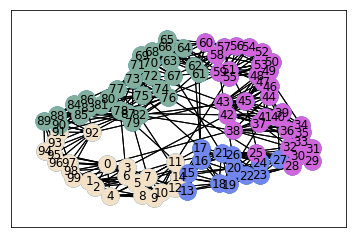

In [78]:
nx.draw_networkx(sw,pos)
for i in range(4):
    nx.draw_networkx_nodes(sw, pos, with_labels=True, nodelist=cd[i], node_color=[np.random.uniform(0.25,0.95,3)]) # generates a random RGB color
nx.draw_networkx_edges(sw,pos)
plt.show()

<h2>Metric: Modularity</h2>
Modularity is a network metric that measures how much community structure a network has. The modularity of a network calculated against a null random graph generated via the configuration model. The configuration model takes a prescribed degree distribution but has a random rewiring of edges. One can view the null configuration model graph as cutting all the edges of the original graph, but preserving the "stubs" on the vertices, and randomly rewiring all the stubs.

The modularity of a graph with $c$ communities is then calculated as:
\begin{align}
Q = \frac{1}{2m} \sum_{vw} \big[\frac{A_{vw}}{2m} - \frac{k_v k_w}{(2m)^2}\big]\delta(c_v, c_w)
\end{align}
where $m$ is the total number of edges, $v,w$ are nodes in the graph, $A_{vw}$ is the actual number of edges between $v$ and $w$, $k_v$ is the degree of the node, and $\delta$ is the dirac delta function.

The modularity thus measures how much more within-community connectivity we observe in the network over the null model (where connectivity is proportional simply to the degree of the node). By choosing which communities the vertices belong to, we can try to maximize $Q$.

<h2>Algorithm: Modularity Maximization Heuristics</h2>
(Louvain 2008) offers a percolation-inspired heuristic for community detection. The algorithm has two phases that are applied iteratively: the first phase is a greedy algorithm that places all nodes in their own community, then each node is moved to the community that gives the maximum gain in modularity. This is repeated for all nodes until no more modularity improvement can be made.

The second phase builds a new graph where the communities from phase 1 are collapsed into a single node, and the edges between communities collapse into single edges between the respective nodes with equivalent weight. Then phase 1 is repeated on this reduced graph, and the passes continue until no changes occur over a pass.

In [79]:
!pip install python-louvain

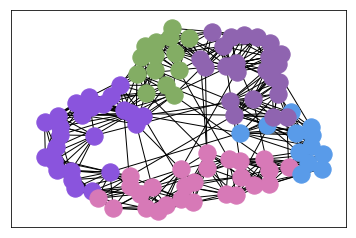

In [80]:
import community

#first compute the best partition
partition = community.best_partition(sw)

#drawing
size = float(len(set(partition.values())))
count = 0
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(sw, pos, list_nodes,
                                node_color = np.random.uniform(0.25,0.95,3))

nx.draw_networkx_edges(sw, pos)
plt.show()

<h1>Centrality metrics</h1>

In [81]:
dc = nx.degree_centrality(sw)

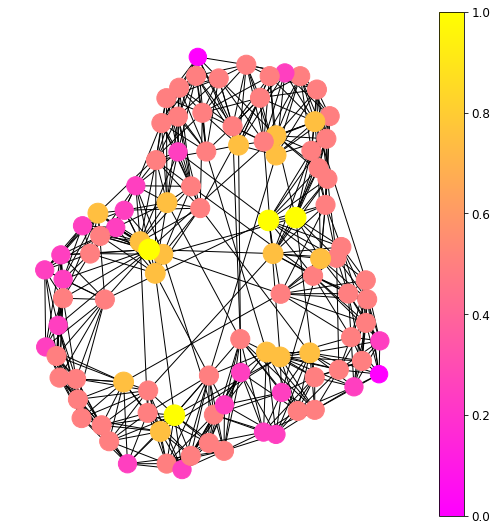

In [89]:
# Degree centrality
plt.figure(2, figsize=(7,7))
nx.draw(sw,
          pos,
          nodelist=list(dc.keys()),
          node_size = [d*3000 for d in list(dc.values())],
          node_color=list(dc.values()),
          font_size=8,
          cmap='spring',
          )
sm = plt.cm.ScalarMappable(cmap='spring')
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=12)
# change color map in networkx plots: look up color maps for matplotlib

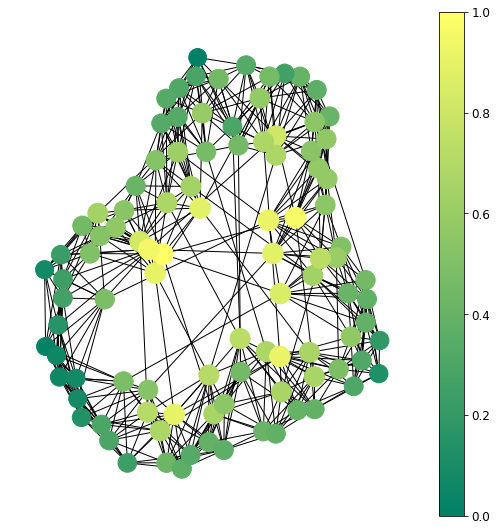

In [90]:
# Closeness centrality
cl = nx.closeness_centrality(sw)
plt.figure(1, figsize=(7,7))
nx.draw(sw,
          pos,
          nodelist=list(cl.keys()),
          node_size = [d*1000 for d in list(cl.values())],
          node_color=list(cl.values()),
          font_size=8,
          cmap='summer',
          )
sm = plt.cm.ScalarMappable(cmap='summer')
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=12)

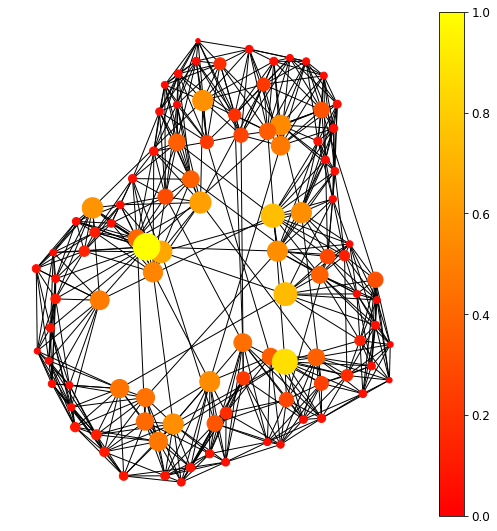

In [91]:
# Betweenness centrality
bc = nx.betweenness_centrality(sw)
plt.figure(1, figsize=(7,7))
nx.draw(sw,
          pos,
          nodelist=list(bc.keys()),
          node_size = [d*10000 for d in list(bc.values())],
          node_color=list(bc.values()),
          font_size=8,
          cmap='autumn',
          )
sm = plt.cm.ScalarMappable(cmap='autumn')
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=12)

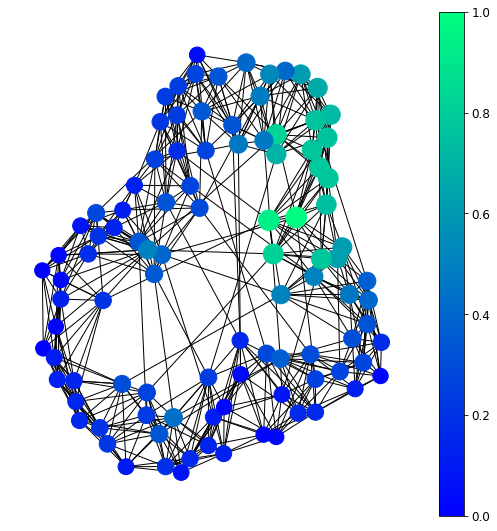

In [92]:
# Eigenvector centrality
ec = nx.eigenvector_centrality(sw ,max_iter=500)
plt.figure(1, figsize=(7,7))
nx.draw(sw,
          pos,
          nodelist=list(ec.keys()),
          node_size = [d*3000 for d in list(ec.values())],
          node_color=list(ec.values()),
          font_size=8,
          cmap='winter',
          )
sm = plt.cm.ScalarMappable(cmap='winter')
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=12)

Text(0,0.5,'Betweenness Centrality')

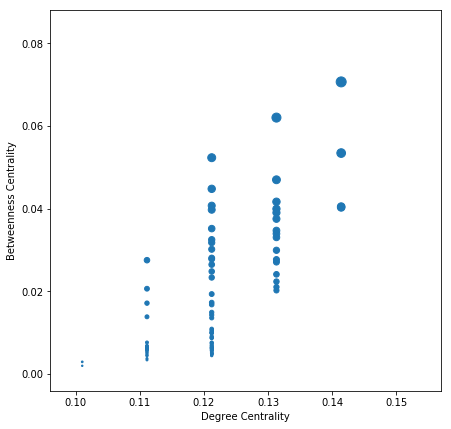

In [93]:
# plot two metrics against each other: closeness vs. eigenvector centrality
x = list(dc.values())
y = list(bc.values())
plt.figure(1, figsize=(7,7))
s = np.multiply(x,y)*1e4
plt.scatter(x,y,s = s)
plt.xlabel('Degree Centrality')
plt.ylabel('Betweenness Centrality')

In [87]:
# list top 10 for both metrics
print('Degree Centrality Top 10:')
print(sorted(dc, key=dc.get,reverse=True)[:10])
print('Betweenness Centrality Top 10:')
print(sorted(bc, key=bc.get,reverse=True)[:10])

Degree Centrality Top 10:
[7, 43, 45, 87, 0, 5, 21, 25, 26, 41]
Betweenness Centrality Top 10:
[87, 26, 43, 38, 82, 76, 86, 63, 45, 7]
